In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
from matplotlib import figure
# %matplotlib.inline
# matplotlib.rcParams['figure.figsize']=(12,8)

import missingno as msno

In [2]:
movies=pd.read_csv('movies.csv')
movies.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
movies.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [5]:
column_list=movies.columns.to_list()
new_column_list=['name',
 'genre',
 'released_date',
 'released_year',
 'country',
 'rating',
 'score',
 'votes',
 'director',
 'writer',
 'star',
 'budget',
 'gross',
 'company',
 'runtime']

In [6]:
movies['released_date']=movies['released'].str.split(',',1,expand=True)[0]

# movies.head()

In [7]:
movies=movies.rename(columns={'year':'released_year'})

In [8]:
movies.drop(['released'],axis=1)


,name,rating,genre,released_year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June 13
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July 2
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June 20
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July 2
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July 25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,October 23
7664,Dream Round,NaN,Comedy,2020,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,February 7
7665,Saving Mbango,NaN,Drama,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,April 27
7666,It's Just Us,NaN,Drama,2020,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,October 1


In [9]:
movies=movies[new_column_list]

In [10]:

movies.head()

,name,genre,released_date,released_year,country,rating,score,votes,director,writer,star,budget,gross,company,runtime
0,The Shining,Drama,June 13,1980,United Kingdom,R,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,Adventure,July 2,1980,United States,R,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,June 20,1980,United States,PG,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,Comedy,July 2,1980,United States,PG,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,Comedy,July 25,1980,United States,R,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000.0,39846344.0,Orion Pictures,98.0


In [11]:
print('The Percantage of missing values in each column:\n')
((movies.isnull().sum()/movies.shape[0])*100).sort_values(ascending=False)

The Percantage of missing values in each column:



budget           28.312467
gross             2.464789
rating            1.004173
company           0.221701
runtime           0.052165
writer            0.039124
votes             0.039124
score             0.039124
country           0.039124
released_date     0.026082
star              0.013041
director          0.000000
released_year     0.000000
genre             0.000000
name              0.000000
dtype: float64

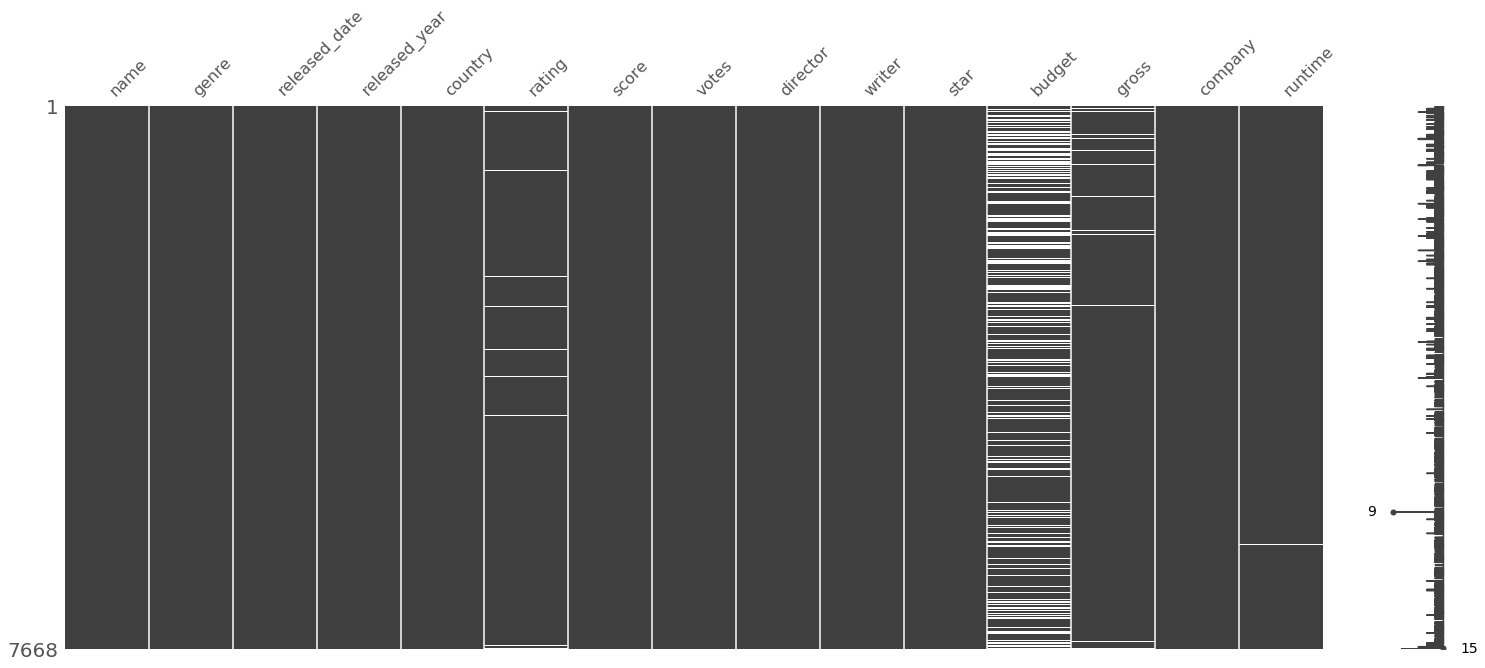

In [12]:
msno.matrix(movies)

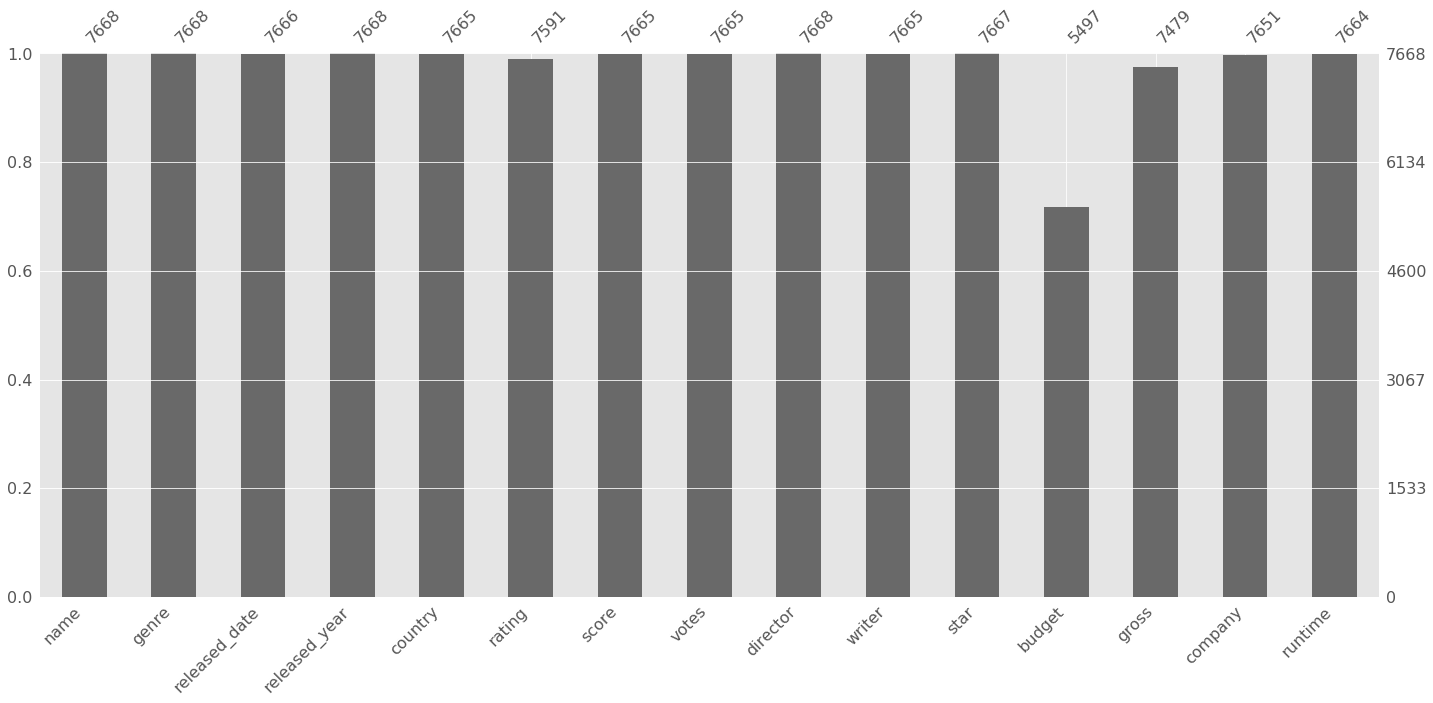

In [13]:
msno.bar(movies)

In [14]:
movies.columns

Index(['name', 'genre', 'released_date', 'released_year', 'country', 'rating',
       'score', 'votes', 'director', 'writer', 'star', 'budget', 'gross',
       'company', 'runtime'],
      dtype='object')

In [15]:
movies[['votes','budget','gross']]=movies[['votes','budget','gross']].fillna(0)


In [16]:
movies['votes']=movies['votes'].astype('int64')
movies['budget']=movies['budget'].astype('int64')
movies['gross']=movies['gross'].astype('int64')

In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7668 non-null   object 
 1   genre          7668 non-null   object 
 2   released_date  7666 non-null   object 
 3   released_year  7668 non-null   int64  
 4   country        7665 non-null   object 
 5   rating         7591 non-null   object 
 6   score          7665 non-null   float64
 7   votes          7668 non-null   int64  
 8   director       7668 non-null   object 
 9   writer         7665 non-null   object 
 10  star           7667 non-null   object 
 11  budget         7668 non-null   int64  
 12  gross          7668 non-null   int64  
 13  company        7651 non-null   object 
 14  runtime        7664 non-null   float64
dtypes: float64(2), int64(4), object(9)
memory usage: 898.7+ KB


In [18]:
movies.head()

,name,genre,released_date,released_year,country,rating,score,votes,director,writer,star,budget,gross,company,runtime
0,The Shining,Drama,June 13,1980,United Kingdom,R,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,Adventure,July 2,1980,United States,R,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,June 20,1980,United States,PG,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000,538375067,Lucasfilm,124.0
3,Airplane!,Comedy,July 2,1980,United States,PG,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,Comedy,July 25,1980,United States,R,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000,39846344,Orion Pictures,98.0


In [19]:
movies['revenue/budget']=movies['gross']/movies['budget']

In [20]:
movies[['gross','budget','revenue/budget']]

,gross,budget,revenue/budget
0,46998772,19000000,2.473620
1,58853106,4500000,13.078468
2,538375067,18000000,29.909726
3,83453539,3500000,23.843868
4,39846344,6000000,6.641057
...,...,...,...
7663,0,7000,0.000000
7664,0,0,NaN
7665,0,58750,0.000000
7666,0,15000,0.000000


In [52]:
movies['revenue/budget']=movies['revenue/budget'].fillna(0)

In [22]:
movies=movies.sort_values(by=['gross','revenue/budget'],inplace=False,ascending=False)

In [37]:
movies.company.value_counts().to_frame()

,company
Universal Pictures,377
Warner Bros.,334
Columbia Pictures,332
Paramount Pictures,320
Twentieth Century Fox,240
...,...
Finnegan/Pinchuk Productions,1
Grace,1
Fons Rademakers Produktie,1
Cohen Media Group,1


##  What features have more correlation to Revenue?

In [41]:
Directors_ls=list(movies['director'].unique())
Directors_ls

['James Cameron',
 'Anthony Russo',
 'J.J. Abrams',
 'Jon Favreau',
 'Colin Trevorrow',
 'Joss Whedon',
 'James Wan',
 'Chris Buck',
 'Ryan Coogler',
 'David Yates',
 'Rian Johnson',
 'J.A. Bayona',
 'Bill Condon',
 'Brad Bird',
 'F. Gary Gray',
 'Shane Black',
 'Kyle Balda',
 'Peter Jackson',
 'Jon Watts',
 'Anna Boden',
 'Michael Bay',
 'Sam Mendes',
 'Roger Allers',
 'Christopher Nolan',
 'Todd Phillips',
 'Josh Cooley',
 'Lee Unkrich',
 'Gore Verbinski',
 'Gareth Edwards',
 'Guy Ritchie',
 'Rob Marshall',
 'Steven Spielberg',
 'Andrew Stanton',
 'George Lucas',
 'Tim Burton',
 'Byron Howard',
 'Chris Columbus',
 'Pierre Coffin',
 'Jake Kasdan',
 'Andrew Adamson',
 'Bryan Singer',
 'Mike Newell',
 'Sam Raimi',
 'Carlos Saldanha',
 'Steve Martino',
 'Chris Renaud',
 'Zack Snyder',
 'Francis Lawrence',
 'James Gunn',
 'Pete Docter',
 'Ruben Fleischer',
 'Taika Waititi',
 'Patty Jenkins',
 'Roland Emmerich',
 'Chris Miller',
 'Alfonso Cuarón',
 'Joachim Rønning',
 'Christopher McQuarri

In [49]:
movies.groupby('director').aggregate({'gross':sum}).sort_values(by=['gross'],ascending=False)

,gross
director,
Steven Spielberg,9629049370
Anthony Russo,6844248984
Peter Jackson,6618045788
Michael Bay,6451692798
James Cameron,6248088578
...,...
Ettore Scola,0
Joe Gayton,0
Arnaud Desplechin,0


In [50]:
movies.groupby('director').aggregate({'budget':sum}).sort_values(by=['budget'],ascending=False)

,budget
director,
Steven Spielberg,1891500000
Michael Bay,1678000000
Ridley Scott,1675800000
Ron Howard,1603500000
Tim Burton,1433000000
...,...
Jordan Rubin,0
Jordan Melamed,0
Joo-hwan Kim,0


In [53]:
movies.groupby('director').aggregate({'revenue/budget':sum}).sort_values(by=['revenue/budget'],ascending=False)

,revenue/budget
director,
A.R. Murugadoss,inf
Kevin Shulman,inf
Kyle Patrick Alvarez,inf
Krzysztof Kieslowski,inf
Kriv Stenders,inf
...,...
Eliseo Subiela,0.0
Claudia Weill,0.0
Mehdi Charef,0.0


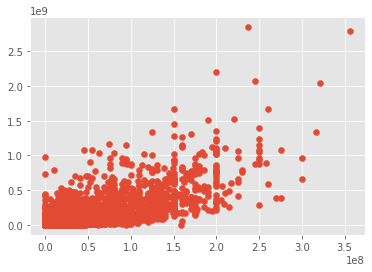

In [59]:
plt.scatter(movies['budget'],movies['gross'])